Интрепретация доступна для слоев:
'Conv2d', 'AvgPool2d', 'MaxPool2d', 'AdaptiveAvgPool2d', 'Conv1d', 'Linear', 'Dropout', 'ReLU', 'Sigmoid', 'BatchNorm2d', LSTM(bidirectional=False)

Если в модели есть слои, которых нет списке, то алгоритм не считает на них релевансть и просто пропускает.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

import torch
from torch import nn
import torch.nn.functional as F

from lrp_layers import LRP

Выбираем модель такую же, как и в основном модуле

In [2]:
class CNNModel(nn.Module):
    def __init__(self, in_features: int):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv1d(in_features, 12, 5, padding='same'),
            nn.ReLU(),
            nn.Conv1d(12, 12, 5, padding='same'),
            nn.ReLU(),
            nn.Conv1d(12, 2, 5, padding='same')
        )

    def forward(self, batch):
        inputs = torch.cat((batch['ohe-sequence'], batch['omics']), 1)
        logits = self.layers(inputs)
        proba = nn.functional.softmax(logits, dim=1)

        return {'proba': proba, 'logits': logits}

In [3]:
features = 4 + 10

model = CNNModel(features).cuda()

Загружаем веса модели, которые получили в основном модуле

In [4]:
model.load_state_dict(torch.load("../DL-template/artifacts/checkpoints/best_model_valid_mF1=0.0765.pt"))
model.eval()

CNNModel(
  (layers): Sequential(
    (0): Conv1d(14, 12, kernel_size=(5,), stride=(1,), padding=same)
    (1): ReLU()
    (2): Conv1d(12, 12, kernel_size=(5,), stride=(1,), padding=same)
    (3): ReLU()
    (4): Conv1d(12, 2, kernel_size=(5,), stride=(1,), padding=same)
  )
)

Загружаем тензор, для которого хотим посмотреть результаты

In [6]:
x = torch.load("tensor.pt")
x

{'targets': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]),
 'ohe-sequence': tensor([[[0., 0., 0.,  ..., 1., 0., 0.],
          [1., 1., 0.,  ..., 0., 0., 0.],
          [0., 0., 1.,  ..., 0., 1., 0.],
          [0., 0., 0.,  ..., 0., 0., 1.]],
 
         [[0., 0., 0.,  ..., 0., 1., 1.],
          [1., 1., 0.,  ..., 1., 0., 0.],
          [0., 0., 1.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[1., 0., 0.,  ..., 0., 1., 0.],
          [0., 1., 1.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 1., 0., 1.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 1., 0.,  ..., 1., 1., 1.],
          [0., 0., 1.,  ..., 0., 0., 0.],
          [1., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
     

Работа с LRP

In [7]:
lrp_model = LRP(model)

In [8]:
x1 = torch.cat((x['ohe-sequence'], x['omics']), 1)[0]
x1 = torch.unsqueeze(x1, 0).reshape(14, 1024).cuda()

В get_features необходимо передать 1 объект

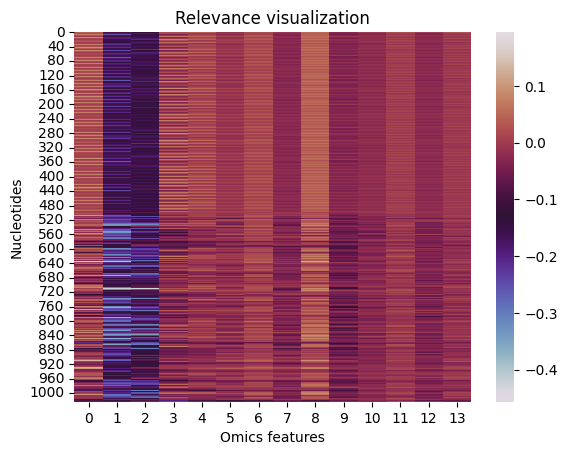

In [9]:
r = lrp_model.get_features(x1, visualize=True)